### lecture 22 - Forecast Evaluations

In [7]:
import pandas as pd # type: ignore
from prophet import Prophet # type: ignore

In [2]:
df = pd.read_csv('./dataset/Miles_Traveled.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [4]:
df.columns = ['ds','y']

In [5]:
df['ds'] = pd.to_datetime(df['ds'])

In [8]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


<Axes: xlabel='ds'>

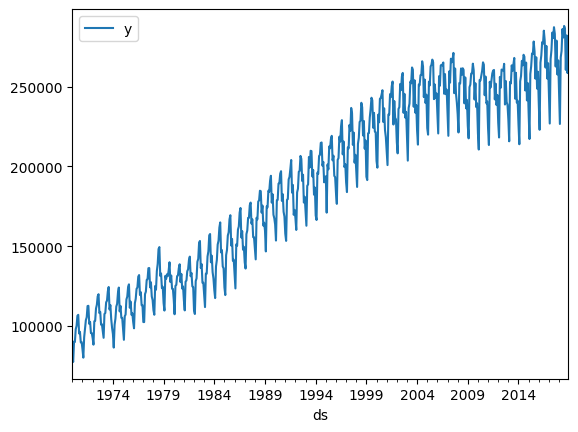

In [9]:
df.plot(x='ds',y='y')

#### train and test split

In [11]:
len(df)

588

In [12]:
train = df.iloc[:576]

In [13]:
test = df.iloc[576:]

#### model fitting

In [14]:
m = Prophet()

In [15]:
m.fit(train)

18:01:23 - cmdstanpy - INFO - Chain [1] start processing
18:01:23 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
future = m.make_future_dataframe(periods=12,freq='MS')

In [17]:
forecast = m.predict(future)

In [18]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263433.764946,273897.160552,285558.741244,263387.425551,263503.516570,16446.103774,16446.103774,16446.103774,16446.103774,16446.103774,16446.103774,0.0,0.0,0.0,279879.868721
584,2018-09-01,263575.997014,256274.022160,267397.894601,263496.998234,263686.318732,-1672.204614,-1672.204614,-1672.204614,-1672.204614,-1672.204614,-1672.204614,0.0,0.0,0.0,261903.792400
585,2018-10-01,263713.640950,263178.752468,274474.631463,263614.032717,263864.864916,5303.845016,5303.845016,5303.845016,5303.845016,5303.845016,5303.845016,0.0,0.0,0.0,269017.485965
586,2018-11-01,263855.873017,250171.924535,261272.540076,263721.255699,264050.485598,-8211.000928,-8211.000928,-8211.000928,-8211.000928,-8211.000928,-8211.000928,0.0,0.0,0.0,255644.872089
587,2018-12-01,263993.516953,251162.662782,262792.991206,263819.358721,264232.502639,-6924.466446,-6924.466446,-6924.466446,-6924.466446,-6924.466446,-6924.466446,0.0,0.0,0.0,257069.050507


<Axes: xlabel='ds'>

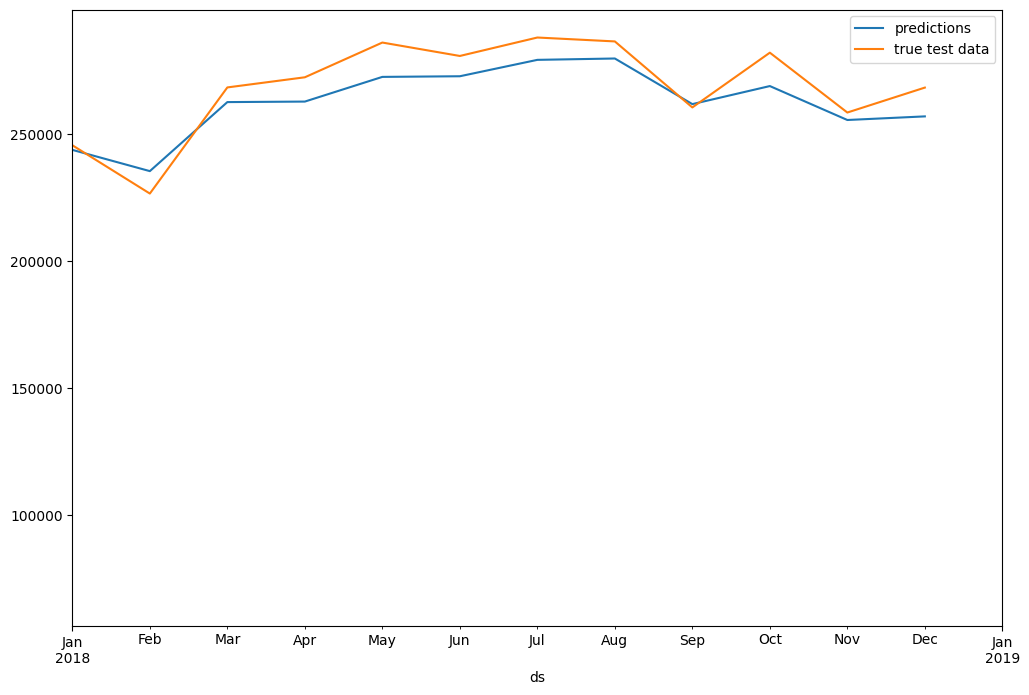

In [20]:
ax = forecast.plot(x='ds',y='yhat',label='predictions',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='true test data',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'))

#### model evaluation

In [30]:
from statsmodels.tools.eval_measures import rmse # type: ignore

In [31]:
predictions = forecast.iloc[-12:]['yhat']

In [32]:
predictions

576    243869.071258
577    235498.375832
578    262700.620438
579    262904.952053
580    272630.294732
581    272883.308600
582    279342.929360
583    279879.868721
584    261903.792400
585    269017.485965
586    255644.872089
587    257069.050507
Name: yhat, dtype: float64

In [33]:
test['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [36]:
rmse(predictions,test['y'])

8604.302194732816

In [35]:
test.mean()

ds    2018-06-16 12:00:00
y           268739.666667
dtype: object

#### Prophet diagnostics

Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values.

In [39]:
from prophet.diagnostics import cross_validation,performance_metrics # type: ignore
from prophet.plot import plot_cross_validation_metric # type: ignore

The initial period should be long enough to capture all of the components of the model, in particular seasonalities and extra regressors: at least a year for yearly seasonality, at least a week for weekly seasonality, etc.

In [40]:
# initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# fold every 5 years
period = 5 * 365
period = str(period) + ' days'
# forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [41]:
df_cv = cross_validation(m,initial=initial,period=period,horizon=horizon)

  0%|          | 0/9 [00:00<?, ?it/s]

18:11:39 - cmdstanpy - INFO - Chain [1] start processing
18:11:39 - cmdstanpy - INFO - Chain [1] done processing
18:11:39 - cmdstanpy - INFO - Chain [1] start processing
18:11:40 - cmdstanpy - INFO - Chain [1] done processing
18:11:40 - cmdstanpy - INFO - Chain [1] start processing
18:11:40 - cmdstanpy - INFO - Chain [1] done processing
18:11:40 - cmdstanpy - INFO - Chain [1] start processing
18:11:40 - cmdstanpy - INFO - Chain [1] done processing
18:11:40 - cmdstanpy - INFO - Chain [1] start processing
18:11:40 - cmdstanpy - INFO - Chain [1] done processing
18:11:41 - cmdstanpy - INFO - Chain [1] start processing
18:11:41 - cmdstanpy - INFO - Chain [1] done processing
18:11:41 - cmdstanpy - INFO - Chain [1] start processing
18:11:41 - cmdstanpy - INFO - Chain [1] done processing
18:11:41 - cmdstanpy - INFO - Chain [1] start processing
18:11:41 - cmdstanpy - INFO - Chain [1] done processing
18:11:42 - cmdstanpy - INFO - Chain [1] start processing
18:11:42 - cmdstanpy - INFO - Chain [1]

In [42]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.045736,106961.369012,109939.838228,102445.0,1976-12-11
1,1977-02-01,102996.069494,101480.856395,104470.003090,102416.0,1976-12-11
2,1977-03-01,118973.276565,117472.682673,120486.990218,119960.0,1976-12-11
3,1977-04-01,120612.885433,119175.081255,122019.284370,121513.0,1976-12-11
4,1977-05-01,127882.985779,126401.494683,129431.947268,128884.0,1976-12-11


usefull link to understand initial,period,horizon and cutoff: https://facebook.github.io/prophet/docs/diagnostics.html

In [43]:
len(df_cv)

108

In [44]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,52 days,2.444316e+07,4944.002132,4543.524001,0.027822,0.023395,0.027403,0.4
1,53 days,2.194478e+07,4684.526050,4278.142802,0.025076,0.023395,0.024777,0.4
2,54 days,1.850311e+07,4301.523929,3755.453769,0.020194,0.022195,0.020035,0.5
3,55 days,2.338050e+07,4835.338344,4274.607033,0.023245,0.023395,0.022996,0.4
4,57 days,2.120514e+07,4604.904249,4014.174881,0.021540,0.022195,0.021331,0.5
...,...,...,...,...,...,...,...,...
94,360 days,1.856034e+07,4308.171304,3760.668727,0.019600,0.019726,0.019607,0.5
95,361 days,1.763795e+07,4199.756090,3480.698150,0.018200,0.018869,0.018218,0.5
96,362 days,3.198060e+07,5655.139536,4409.507626,0.022012,0.024765,0.021910,0.4
97,364 days,3.018403e+07,5493.999829,4241.143037,0.021382,0.021611,0.021293,0.5


c:\Users\adepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\Users\adepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


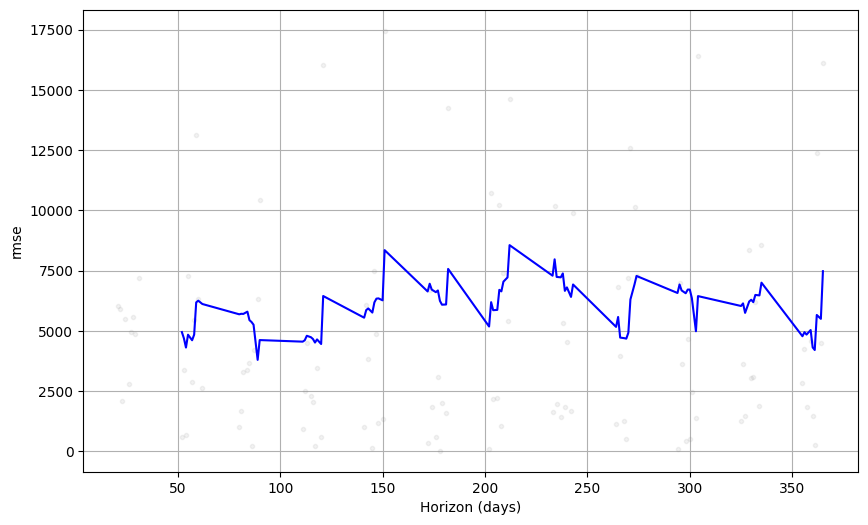

In [47]:
plot_cross_validation_metric(df_cv,metric='rmse'); # rmse per horizon

c:\Users\adepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\Users\adepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


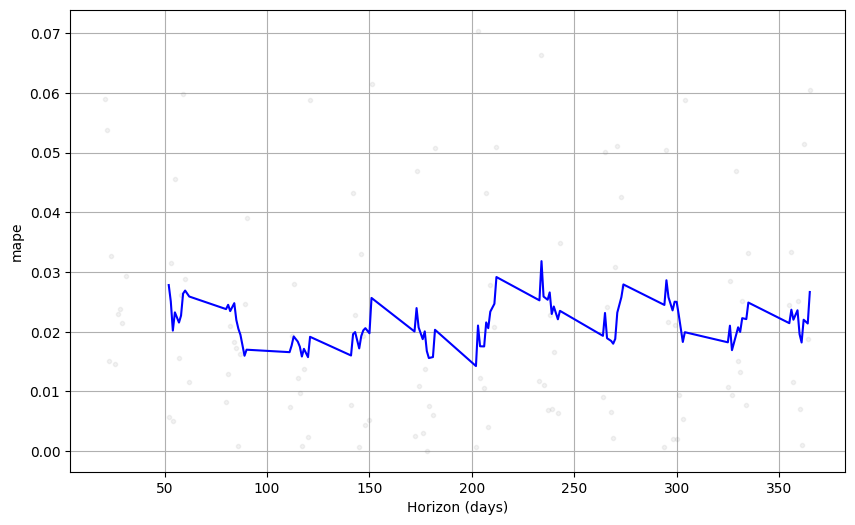

In [50]:
plot_cross_validation_metric(df_cv,metric='mape');